# PCA Project

In this project we work on Fashion MNIST Dataset.


*   **Name**: Jun Sung Park



# Fashion-MNIST dataset
Fashion-MNIST is a dataset for clothes. 
Each image in Fashion-MNIST has 28x28 pixels which can be represented in an array with 784 elements. You can take a better look at this dataset in this [link](https://www.openml.org/d/40996) 

In this part, we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.

In [60]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
x = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

In [61]:
x.shape

(1000, 784)

Label is: Ankle boot


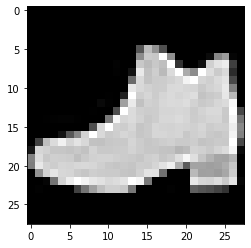

In [62]:
import matplotlib.pyplot as plt 
plt.gray() 
ind = 15
plt.imshow(x.loc[ind].values.reshape(28,28)) 
print ("Label is:", target_encoding[int(y[ind])])
plt.show() 

Label is: Shirt


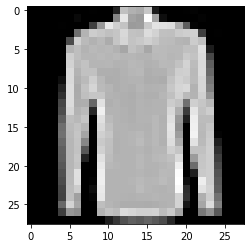

In [63]:
# Testing
plt.gray() 
ind = 40
plt.imshow(x.loc[ind].values.reshape(28,28)) 
print ("Label is:", target_encoding[int(y[ind])])
plt.show() 

## Part 1

Create a new dataset by selecting images from only three categories (three distinct labels).

In [65]:
df_part4 = x.copy()
df_part4["label"] = y
# Selected 5 (Sandal), 7 (Sneaker), 9 (Ankle boot) labels
new_df = df_part4[(df_part4["label"] == "5")|(df_part4["label"] == "7")|(df_part4["label"] == "9")].reset_index(drop=True)
x_new = new_df.iloc[:,:-1]
y_new = new_df.iloc[:,-1]
x_new

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,64.0,42.0,24.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
y_new

0      9
1      7
2      5
3      5
4      9
      ..
309    9
310    5
311    5
312    7
313    9
Name: label, Length: 314, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

To compress and reconstruct images better with PCA, it is better to choose items that are similar in shape. why?

It is better to choose items that are similar in shape because our goal in the end is to reconstruct images using selected eigenvectors. For example, the reconstruction of images would be simple if all items are shoes (sandal, sneaker, and ankle boot). However, if we mix a shirt and a bag with 3 shoes items, which are fundamentally very different in shapes compared to shoes, we will have harder time to reconstruct the image.

## Part 2

Compute Eigenvectors and Eigenvalues. 

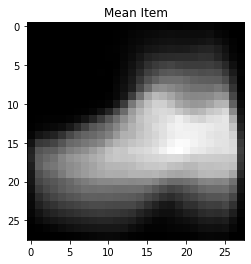

In [68]:
def asRowMatrix(X):
    X = X.values
    if len(X) == 0: return np.array([])
    rowMatrix = np.empty((0, X[0].size), dtype = X[0].dtype)
    for img in X:
        rowMatrix = np.vstack((rowMatrix, np.asarray(img).reshape(1, -1)))
    return rowMatrix

XMat = asRowMatrix(x_new);
meanImage = np.reshape(XMat.mean(axis=0), x_new.values[0].shape)
plt.imshow(meanImage.reshape(28,28), cmap=plt.cm.gray)
plt.title('Mean Item')
plt.show()

In [69]:
XMat.shape

(314, 784)

In [70]:
# Get number of eigenvalues
def getBasisCountThatPreservesVariance(eigenValues, variance=0.98):
    for idx, cumulativeSum in enumerate(np.cumsum(eigenValues) / np.sum(eigenValues)):
        if cumulativeSum > variance:
            return idx

def pca(X, y):
    n, d = X.shape
    mu = X.mean(axis=0)
    X = X - mu # standardising data

    
    # Note: This is the case when the number of samples is more than the number of features. 
    if n > d:  
        C = np.dot(X.T,X) / (n-1) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)

    # Case when if you have many many features, apply it to sample
    else:
        C = np.dot(X,X.T) / (n-1) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
        eigenVectors = np.dot(X.T, eigenVectors)
        for i in range(n):
            eigenVectors[:,i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i]) 

    print ("Dim of Full Eigen Vectors", eigenVectors.shape)
            
    
    # sort eigenVectors in descending order by their eigenValue
    idx = np.argsort(-eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]
    
    # select based on numOfBasis
    numOfBasis = getBasisCountThatPreservesVariance(eigenValues)
    print('Number of useful eigenBasis are: ', numOfBasis)
    eigenValues = eigenValues[0:numOfBasis].copy()
    eigenVectors = eigenVectors[:, 0:numOfBasis].copy()
    return eigenValues, eigenVectors, mu 

eigenValues_p4, eigenVectors_p4, mean_p4 = pca(XMat, y_new)

Dim of Full Eigen Vectors (784, 314)
Number of useful eigenBasis are:  148


In [71]:
print("EigenVectors: ", eigenValues_p4)

EigenVectors:  [994502.27105248 423714.50430105 231504.35304924 101607.69321682
  77899.95328068  67417.35185631  58278.57095382  53178.50284623
  48380.33037253  45440.46292951  37865.27160942  35023.94543106
  32143.40356174  30926.48177921  26491.72985672  24602.34243442
  24248.82111666  22910.52938118  22191.63591787  18733.79069717
  17923.86074127  16993.83139631  16129.97606477  15736.58704022
  15672.77620165  15236.28467076  14212.0572728   13448.16036246
  13144.83947378  12786.40309877  12239.59775284  11809.55656914
  11453.2197923   11223.26138131  10476.15747828  10007.82038863
   9812.98934501   9613.90886493   9330.37923688   9114.76467615
   9065.21446574   8714.39437588   8381.51653422   8326.00383573
   8099.03245401   8032.62257825   7572.39009633   7389.98655105
   7083.83910429   6940.3919688    6738.39305145   6614.6827676
   6321.11430486   6134.9922488    5906.91724733   5874.0249692
   5762.24176922   5587.43072587   5525.71248667   5481.14156994
   5193.0896

In [72]:
print("EigenValues: ", eigenValues_p4)

EigenValues:  [994502.27105248 423714.50430105 231504.35304924 101607.69321682
  77899.95328068  67417.35185631  58278.57095382  53178.50284623
  48380.33037253  45440.46292951  37865.27160942  35023.94543106
  32143.40356174  30926.48177921  26491.72985672  24602.34243442
  24248.82111666  22910.52938118  22191.63591787  18733.79069717
  17923.86074127  16993.83139631  16129.97606477  15736.58704022
  15672.77620165  15236.28467076  14212.0572728   13448.16036246
  13144.83947378  12786.40309877  12239.59775284  11809.55656914
  11453.2197923   11223.26138131  10476.15747828  10007.82038863
   9812.98934501   9613.90886493   9330.37923688   9114.76467615
   9065.21446574   8714.39437588   8381.51653422   8326.00383573
   8099.03245401   8032.62257825   7572.39009633   7389.98655105
   7083.83910429   6940.3919688    6738.39305145   6614.6827676
   6321.11430486   6134.9922488    5906.91724733   5874.0249692
   5762.24176922   5587.43072587   5525.71248667   5481.14156994
   5193.08963

In [73]:
eigenValues_p4.shape , eigenVectors_p4.shape

((148,), (784, 148))

In [74]:
print("Dimension of eigenvector will be: ", eigenVectors_p4[:, 0].shape)

Dimension of eigenvector will be:  (784,)


## Part 3

Plot the first 10 eigenvectors (as images similar to eigenfaces).

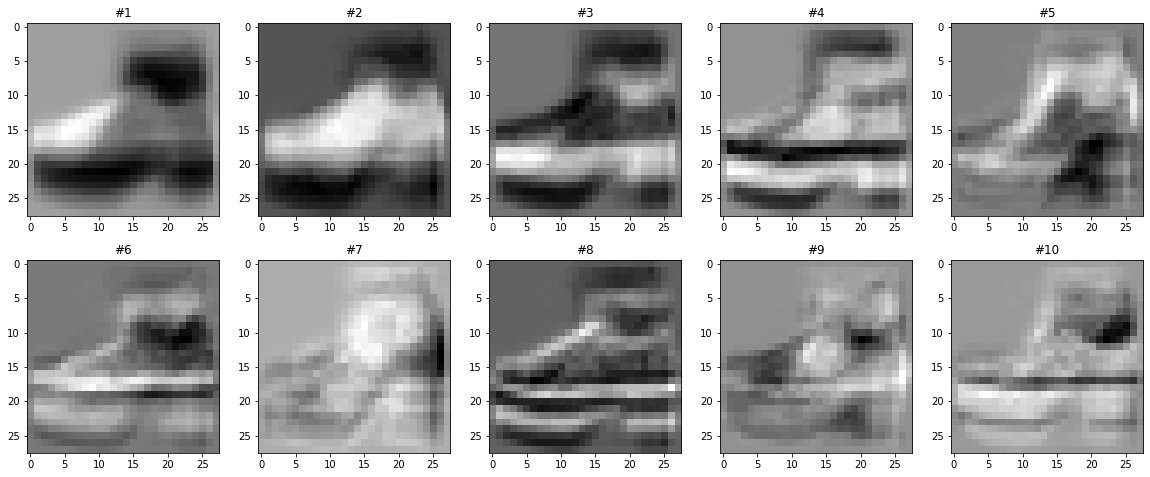

In [76]:
# print first 10 eigenvectors
COUNT = 10
ROWS = math.ceil(COUNT/5)
fig = plt.figure(figsize=(20, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 5, i+1)
    plt.imshow(eigenVectors_p4[:, i].reshape(-1, 28), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

**What trends do you observe?**

Here, we can notice that although the colours of items and backgrounds vary for each plot, we can notice that the shapes of items resemble that of shoes. The idea is, there exist a differentiation between which pixels are more important and which 
pixels are less important. It can be observed that unlike the images of first few PCs (let's say #1, #2, #3), the last few images are harder to distinguish, implying that the images become noisier. 

## Part 4

Create a function that requires an argument  n  and plots a random image from the dataset, as well as a reconstruction with the first  n  th principal components. 


In [77]:
# Create a function that requires an argument  n  and plots a random image from the dataset, as well as a reconstruction with the first  n  th principal components. 

# Helper Functions:
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu

# Main Function:
def part4_4(x, y, n):

  target_encoding = {0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"}

  eigenValues, eigenVectors, mean = pca(x, y)
  print("\n")

  # Random Image idx in dataset: 
  IMAGE_IDX = random.randint(0, len(x)-1)

  # Actual image
  plt.gray()
  plt.imshow(x.loc[IMAGE_IDX].values.reshape(28,28))
  print ("Label is:", target_encoding[int(y[IMAGE_IDX])])
  print("Showing Random Image from dataset")
  plt.show()
  print("\n")

  # create reconstructed images
  P = project(eigenVectors[:, 0:n], x.loc[IMAGE_IDX].to_numpy().reshape(1, -1), mean.to_numpy())
  R = reconstruct(eigenVectors[:, 0:n], P, mean.to_numpy())
  reconImage = R.reshape(x.loc[0].shape)

  # plot reconstructed images
  print("Showing Reconstructed Image using " + str(n) + " Principle Components")
  fig = plt.figure(figsize=(4, 4))
  plt.imshow(reconImage.reshape(28,28), cmap = plt.cm.gray)
  plt.title("Reconstruction:"+ str(n) + " Components" )
  plt.show()
  print("\n")

## Part 5

Run your function a few times, and determine how many components are required so that we (humans!) can identify the items.


In [78]:
# Run your function a few times, and determine how many components are required so that we (humans!) can identify the items.

# Response: 
# Below, I have run my function several times, varying the value of n (reconstruction with the first n-th principle components). 
# I have tested with n = 1, 10, 40, 60, 80, 100, 120, 140, 148, 180, and 250. 
# It can be observed that as n gets closer to 148, the number of useful eigenBasis, the image becomes close to identical to
# the actual randomly selected image. If n is below roughly around 80, the reconstructed image looks not too similar to the original
# item for human to identify correctly. Starting from n value around 80 to 100, it becomes more distinguishable for human to
# classify if the item is a sandal, a sneaker, or an ankle boot. After reaching n = 148, increasing the value of n does not greatly
# help in terms of improving the quality of the image for identification. Therefore, n = 148 is enough to clearly identify 
# the item with human eyes. 

Dim of Full Eigen Vectors (784, 314)
Number of useful eigenBasis are:  148


Label is: Sneaker
Showing Random Image from dataset


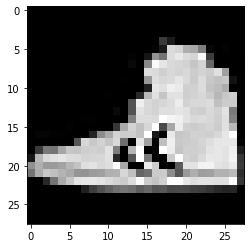



Showing Reconstructed Image using 1 Principle Components


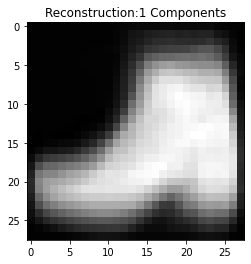

In [79]:
part4_4(x_new, y_new, 1)

Dim of Full Eigen Vectors (784, 314)
Number of useful eigenBasis are:  148


Label is: Sandal
Showing Random Image from dataset


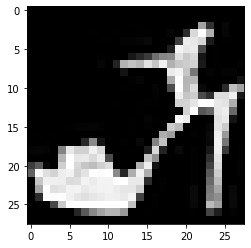



Showing Reconstructed Image using 10 Principle Components


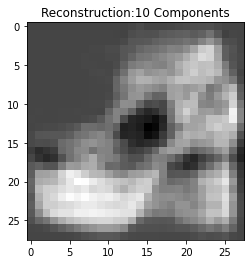

In [80]:
part4_4(x_new, y_new, 10)

Dim of Full Eigen Vectors (784, 314)
Number of useful eigenBasis are:  148


Label is: Ankle boot
Showing Random Image from dataset


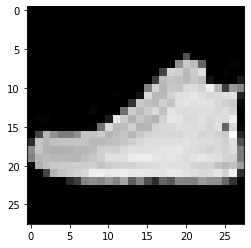



Showing Reconstructed Image using 40 Principle Components


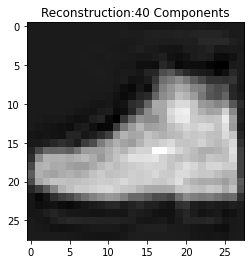

In [81]:
part4_4(x_new, y_new, 40)

Dim of Full Eigen Vectors (784, 314)
Number of useful eigenBasis are:  148


Label is: Sandal
Showing Random Image from dataset


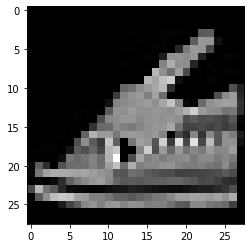



Showing Reconstructed Image using 60 Principle Components


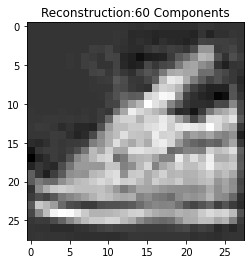

In [82]:
part4_4(x_new, y_new, 60)

Dim of Full Eigen Vectors (784, 314)
Number of useful eigenBasis are:  148


Label is: Sandal
Showing Random Image from dataset


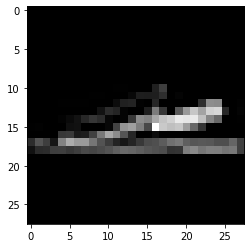



Showing Reconstructed Image using 80 Principle Components


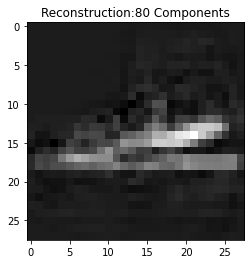

In [83]:
part4_4(x_new, y_new, 80)

Dim of Full Eigen Vectors (784, 314)
Number of useful eigenBasis are:  148


Label is: Sandal
Showing Random Image from dataset


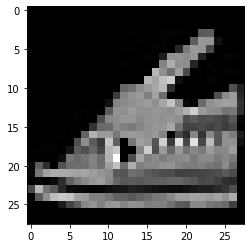



Showing Reconstructed Image using 100 Principle Components


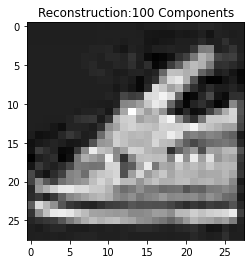

In [84]:
part4_4(x_new, y_new, 100)

Dim of Full Eigen Vectors (784, 314)
Number of useful eigenBasis are:  148


Label is: Sandal
Showing Random Image from dataset


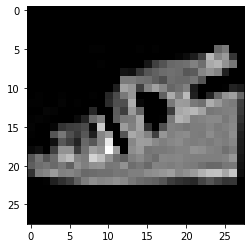



Showing Reconstructed Image using 120 Principle Components


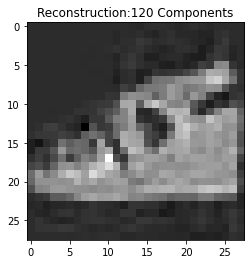

In [85]:
part4_4(x_new, y_new, 120)

Dim of Full Eigen Vectors (784, 314)
Number of useful eigenBasis are:  148


Label is: Ankle boot
Showing Random Image from dataset


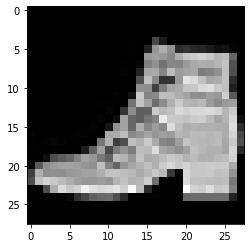



Showing Reconstructed Image using 140 Principle Components


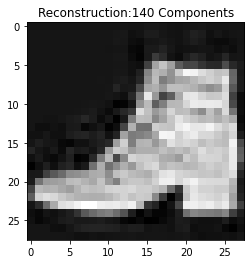

In [86]:
part4_4(x_new, y_new, 140)

Dim of Full Eigen Vectors (784, 314)
Number of useful eigenBasis are:  148


Label is: Sneaker
Showing Random Image from dataset


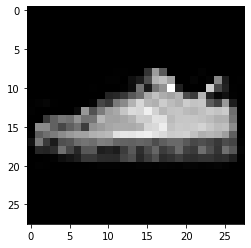



Showing Reconstructed Image using 148 Principle Components


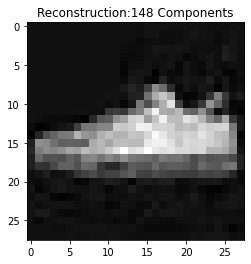

In [87]:
part4_4(x_new, y_new, 148)

Dim of Full Eigen Vectors (784, 314)
Number of useful eigenBasis are:  148


Label is: Sandal
Showing Random Image from dataset


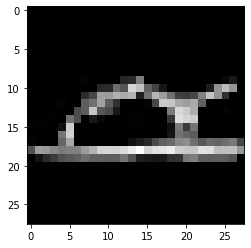



Showing Reconstructed Image using 180 Principle Components


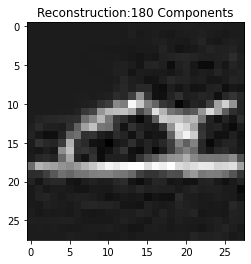

In [88]:
part4_4(x_new, y_new, 180)

Dim of Full Eigen Vectors (784, 314)
Number of useful eigenBasis are:  148


Label is: Sneaker
Showing Random Image from dataset


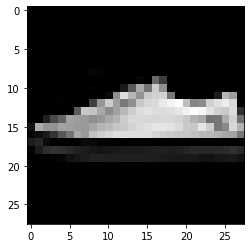



Showing Reconstructed Image using 250 Principle Components


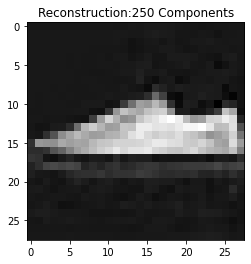

In [89]:
part4_4(x_new, y_new, 250)


Above, I have run my function several times, varying the value of n (reconstruction with the first n-th principle components). 
I have tested with n = 1, 10, 40, 60, 80, 100, 120, 140, 148, 180, and 250. 
It can be observed that as n gets closer to 148, the number of useful eigenBasis, the image becomes close to identical to
the actual randomly selected image. If n is below roughly around 80, the reconstructed image looks not too similar to the original
item for human to identify correctly. Starting from n value around 80 to 100, it becomes more distinguishable for human to
classify if the item is a sandal, a sneaker, or an ankle boot. After reaching n = 148, increasing the value of n does not greatly
help in terms of improving the quality of the image for identification. Therefore, n = 148 is enough to clearly identify 
the item with human eyes. 

## Part 6

Assume you want to share this dataset with someone else. Instead of directly giving them the whole dataset, 
you can share the eigenvectors (some of them) and projections with them, and thay can do a dot product to get the reconstructions. 
Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images?


In [1]:
# Response:

# From the previous step (Part 4.5), we determined that the first 148 principle components are needed to get the ideal reconstruction. 

# Our dataset X has 1000 samples (images) and 784 features (columns). Hence X: (1000, 784)
# Total Elements = 784,000

# If we apply PCA, we get W: (784, 784)
# Since we determined 148 PCs are enough: W_op: (784, 148)
# Apply Projection: X @ W_op = Proj: (1000, 148)
# Now data is summarized in Proj (1000, 148) and W_op: (784, 148)  ==>  Total elements: 264,032

# Therefore, compression ratio = 784,000 / 264,032 ~ 3X

# The compression ratio is roughly 3 if 148 principle components are needed. 


# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

